# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import time 
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import scipy

# READING DATASET

In [2]:
#loading Dataset
df = pd.read_csv("diabetic_data.csv")

In [3]:
#displaying first 10 rows of data
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768,12522,15738
patient_nbr,8222157,55629189,86047875,82442376,42519267,82637451,84259809,114882984,48330783,63555939
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male,Male,Male,Male,Female,Female
age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100)
weight,?,?,?,?,?,?,?,?,?,?
admission_type_id,6,1,1,1,1,2,3,1,2,3
discharge_disposition_id,25,1,1,1,1,1,1,1,1,3
admission_source_id,1,7,7,7,7,2,2,7,4,4
time_in_hospital,1,3,2,2,1,3,4,5,13,12


In [4]:
#checking shape of the dataset
df.shape

(101766, 50)

# CHECKING MISSING VALUES

In [5]:
#Checking for missing values in dataset
#In the dataset missing values are represented as '?' sign
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count().T)

race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


# Dealing with Missing Values

# eliminating the missing values

#weight contains approximate 98% of the missing values

#Payer code and medical specialty contains approximate 40% missing values

#race, diag_1, diag_2, diag_3 and gender contains very less missing values as compared to other attributes which we dropped so for these attributes we also decided to drop those where missing values contains

#drugs named citoglipton and examide have the same value

before droping medical speciality 

In [6]:
df['medical_specialty'] = df['medical_specialty'].replace('?',np.nan)

In [7]:
df['medical_specialty'] = df['medical_specialty'].fillna('UNK')

In [8]:
print('Number medical specialty:', df.medical_specialty.nunique())
df.groupby('medical_specialty').size().sort_values(ascending = False).to_csv("count_medicalspeciality.xlsx", encoding='utf8')

Number medical specialty: 73


In [9]:
df = df.drop(['weight','payer_code','medical_specialty','race'], axis = 1)

In [10]:
drop_Idx = set(df[(df['diag_1'] == '?') & (df['diag_2'] == '?') & (df['diag_3'] == '?')].index)

drop_Idx = drop_Idx.union(set(df['diag_1'][df['diag_1'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['diag_2'][df['diag_2'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['diag_3'][df['diag_3'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['gender'][df['gender'] == 'Unknown/Invalid'].index))
new_Idx = list(set(df.index) - set(drop_Idx))
df = df.iloc[new_Idx]

In [11]:
df = df.drop(['citoglipton', 'examide'], axis = 1)

In [12]:
df.groupby('discharge_disposition_id').size()

discharge_disposition_id
1     59003
2      2115
3     13897
4       805
5      1167
6     12830
7       604
8       107
9        21
10        6
11     1640
12        3
13      398
14      371
15       63
16       11
17       14
18     3642
19        8
20        2
22     1981
23      406
24       48
25      956
27        5
28      138
dtype: int64

If we look at the IDs_mapping.csv we can see that 11,13,14,19,20,21 are related to death or hospice. We should remove these
samples from the predictive model.

In [13]:
df = df.loc[~df.discharge_disposition_id.isin([11,13,14,19,20,21])]

AFTER ELIMINATING

In [14]:
print(df.shape)

(97822, 44)


# Numerical Features
The easiest type of features to use is numerical features. 
These features do not need any modification. The columns that are numerical that we will use are shown below

In [15]:
cols_num = ['time_in_hospital','num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient','number_diagnoses']

# Categorical Features
The next type of features we want to create are categorical variables. Categorical variables are non-numeric data such as race and gender. To turn these non-numerical data into variables, we encoded them into numerical values.

The first set of categorical data we will deal with are these columns:

In [16]:
cols_cat = [ 'gender', 
       'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed',]

In [17]:
print('Total number of features:', len(cols_num + cols_cat))
print('Numerical Features:',len(cols_num))
print('Categorical Features:',len(cols_cat))


Total number of features: 34
Numerical Features: 8
Categorical Features: 26


# encoding
no.of medication change

#return 0 if the value is steady or no

#return 1 if the value is up or down

no.of times medication changes vs count of patient

In [18]:
keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']
for col in keys:
    colname = str(col) + 'temp'
    df[colname] = df[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)
df['numchange'] = 0
for col in keys:
    colname = str(col) + 'temp'
    df['numchange'] = df['numchange'] + df[colname]
    del df[colname]
    
df['numchange'].value_counts() 

0    71214
1    25214
2     1282
3      107
4        5
Name: numchange, dtype: int64

encoding

#male- 1, ,female- 0

#change(ch)- 0 ,nochange(no)-1

#diabetesMed yes- 1,no- 0

#taking medicine:(steady,up,down)-1,no-0

#a1C test result: >7,>8 =1; normal=0,none=-99

#max_glu_serum: >200,>300 =1;norm=0,none=-99

In [19]:
df['change'] = df['change'].replace('Ch', 1)
df['change'] = df['change'].replace('No', 0)
df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 0)
df['diabetesMed'] = df['diabetesMed'].replace('Yes', 1)
df['diabetesMed'] = df['diabetesMed'].replace('No', 0)
# keys is the same as before
for col in keys:
    df[col] = df[col].replace('No', 0)
    df[col] = df[col].replace('Steady', 1)
    df[col] = df[col].replace('Up', 1)
    df[col] = df[col].replace('Down', 1)

In [20]:
df['A1Cresult'] = df['A1Cresult'].replace('>7', 1)
df['A1Cresult'] = df['A1Cresult'].replace('>8', 1)
df['A1Cresult'] = df['A1Cresult'].replace('Norm', 0)
df['A1Cresult'] = df['A1Cresult'].replace('None', -99)
df['max_glu_serum'] = df['max_glu_serum'].replace('>200', 1)
df['max_glu_serum'] = df['max_glu_serum'].replace('>300', 1)
df['max_glu_serum'] = df['max_glu_serum'].replace('Norm', 0)
df['max_glu_serum'] = df['max_glu_serum'].replace('None', -99)

no.of vsits visited bt patient

In [21]:
n_by_state = df.groupby("patient_nbr")["readmitted"].count()

In [22]:
n_by_state.to_csv("no_of_patient_visited.xlsx", encoding='utf8')

In [23]:
df['OUTPUT_LABEL'] = (df.readmitted == '<30').astype('int')

In [24]:
col2use = cols_num + cols_cat
df_data = df[col2use + ['OUTPUT_LABEL']]

C:\Users\Pooja\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distrinution of Readmission')

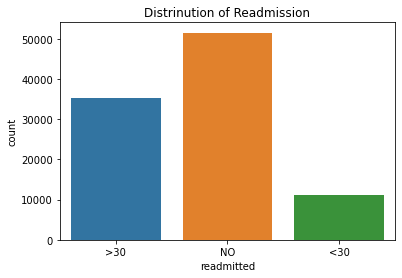

In [25]:
sns.countplot(df['readmitted']).set_title('Distrinution of Readmission')

Text(0.5, 1.0, 'Age of Patient VS. Readmission')

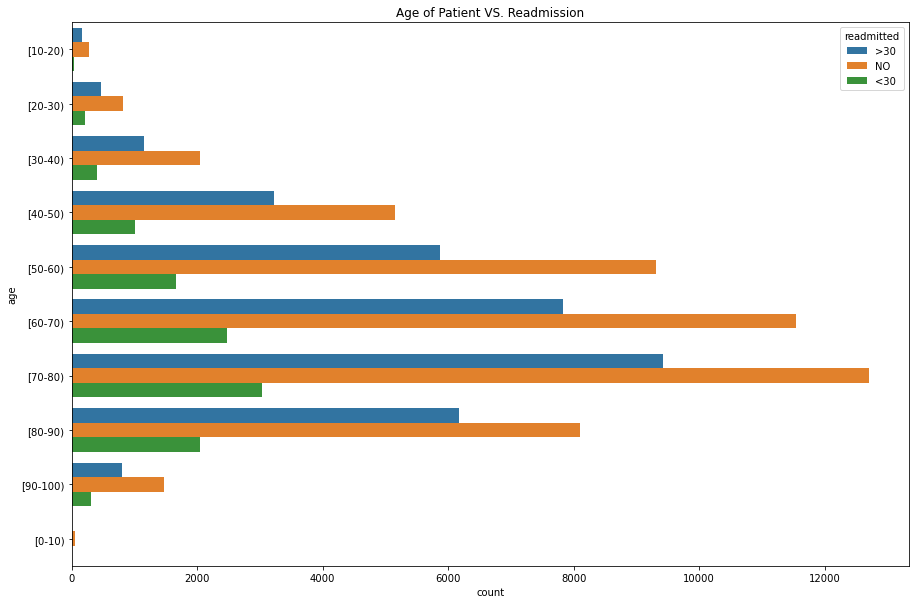

In [26]:
#age and readmission
fig = plt.figure(figsize=(15,10))
sns.countplot(y= df['age'], hue = df['readmitted']).set_title('Age of Patient VS. Readmission')

In [27]:
df['readmitted'].value_counts()

NO     51485
>30    35130
<30    11207
Name: readmitted, dtype: int64

In [28]:
df['readmitted'] = df['readmitted'].replace('>30', 0)
df['readmitted'] = df['readmitted'].replace('<30', 1)
df['readmitted'] = df['readmitted'].replace('NO', 0)

C:\Users\Pooja\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distrinution of Readmission')

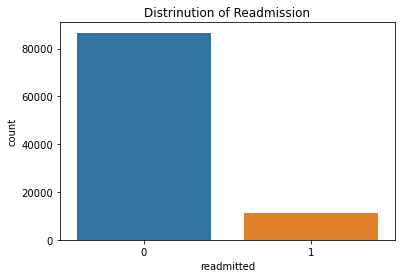

In [29]:
sns.countplot(df['readmitted']).set_title('Distrinution of Readmission')

In [30]:
df['age'].value_counts()

[70-80)     25159
[60-70)     21864
[50-60)     16849
[80-90)     16328
[40-50)      9396
[30-40)      3605
[90-100)     2582
[20-30)      1507
[10-20)       468
[0-10)         64
Name: age, dtype: int64

Text(0.5, 1.0, 'Age of Patient VS. Readmission')

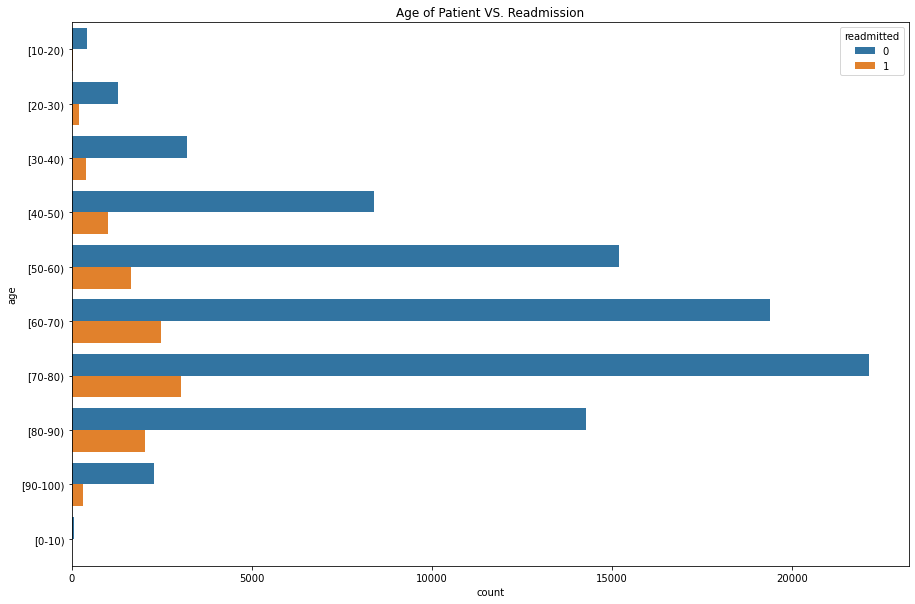

In [31]:
fig = plt.figure(figsize=(15,10))
sns.countplot(y= df['age'], hue = df['readmitted']).set_title('Age of Patient VS. Readmission')

male-1,female-0

C:\Users\Pooja\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Gender of Patient VS. Readmission')

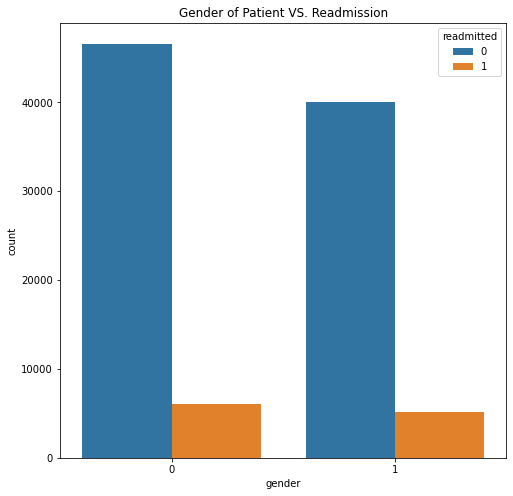

In [32]:
fig = plt.figure(figsize=(8,8))
sns.countplot(df['gender'], hue = df['readmitted']).set_title("Gender of Patient VS. Readmission")

C:\Users\Pooja\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Change of Medication VS. Readmission')

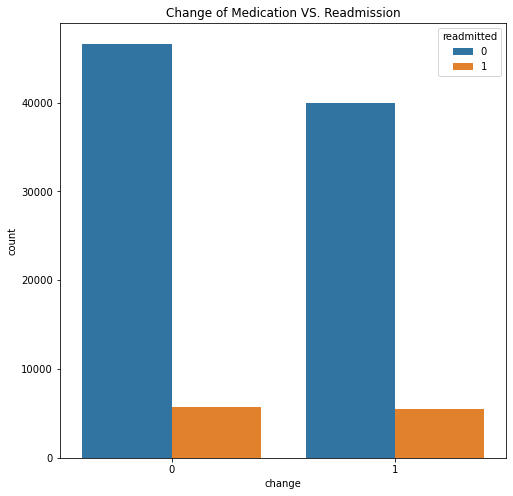

In [33]:
#Change of Medication and Readmission Change = 1 No Change = 0

fig = plt.figure(figsize=(8,8))
sns.countplot(df['change'], hue = df['readmitted']).set_title('Change of Medication VS. Readmission')

C:\Users\Pooja\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Diabetes Medication prescribed VS Readmission')

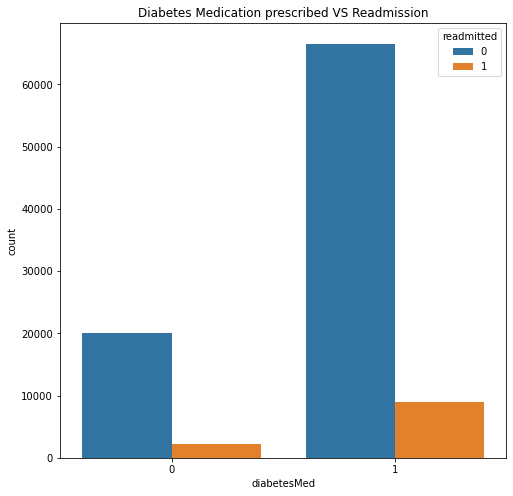

In [34]:
#Diabetes Medication prescribed and Readmission Diabetes Medication - medications Nominal Indicates if there
#was any diabetic medication prescribed. Values: “yes” : 1 “no” : 0

fig = plt.figure(figsize=(8,8))
sns.countplot(df['diabetesMed'], hue = df['readmitted']).set_title('Diabetes Medication prescribed VS Readmission')

Glucose test serum test '>200' : 1 = indicates diabetes '>300' : 1 = Indicates diabetes 'Norm' : 0 = Normal 'None' : -99 = test was not taken

Text(0.5, 1.0, 'Glucose test serum test result VS. Readmission')

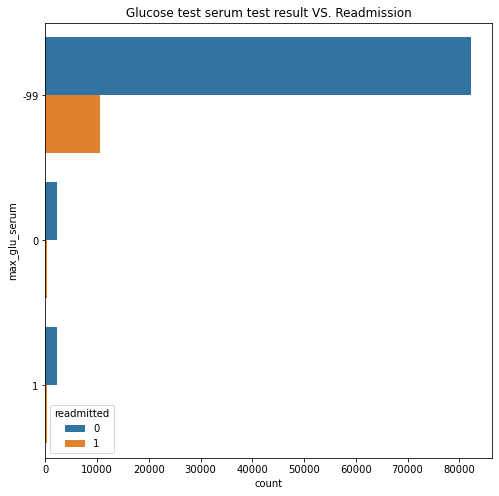

In [35]:
fig = plt.figure(figsize=(8,8))
sns.countplot(y = df['max_glu_serum'], hue = df['readmitted']).set_title('Glucose test serum test result VS. Readmission')

A1C result '>7' : 1 '>8' : 1 Norm : 0 = Normal None : -99 = Test was not taken

Text(0.5, 1.0, 'A1C test result VS. Readmission')

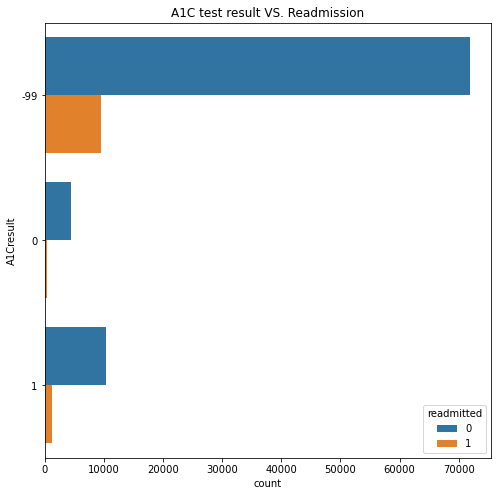

In [36]:
fig = plt.figure(figsize=(8,8))
sns.countplot(y= df['A1Cresult'], hue = df['readmitted']).set_title('A1C test result VS. Readmission')

# Building Training/Validation/Test Samples
So far we have explored our data and created features from the categorical data. It is now time for us to split our data. The idea behind splitting the data is so that you can measure how well your model would do on unseen data. We split into three parts:

- Training samples: these samples are used to train the model
- Validation samples: these samples are held out from the training data and are used to make decisions on how to improve the model
- Test samples: these samples are held out from all decisions and are used to measure the generalized performance of the model
In this project, we will split into 70% train, 15% validation, 15% test.

The first thing I like to do is to shuffle the samples using sample in case there was some order (e.g. all positive samples on top). Here n is the number. random_state is just specified so the entire class gets the same shuffling. You wouldn't need random_state in your own projects.

In [37]:
# shuffle the samples
df_data = df_data.sample(n = len(df_data), random_state = 42)
df_data = df_data.reset_index(drop = True)

We can use sample again to extract 30% (using frac) of the data to be used for validation / test splits. It is important that validation and test come from similar distributions and this technique is one way to do it.

In [38]:
###########################################3

In [39]:
# Save 30% of the data as validation and test data 
df_valid_test=df_data.sample(frac=0.20,random_state=42)
print('Split size: %.3f'%(len(df_valid_test)/len(df_data)))

Split size: 0.200


And now split into test and validation using 50% fraction.

In [40]:
df_test = df_valid_test.sample(frac = 0.5, random_state = 42)
df_valid = df_valid_test.drop(df_test.index)

Note that .drop just drops the rows from df_test to get the rows that were not part of the sample. We can use this same idea to get the training data.

In [41]:
# use the rest of the data as training data
df_train_all=df_data.drop(df_valid_test.index)

At this point, let's check what percent of our groups are hospitalized within 30 days. This is known as prevalence. Ideally, all three groups would have similar prevalance

In [42]:
def calc_prevalence(y_actual):
    return (sum(y_actual)/len(y_actual))

In [43]:
print('Test prevalence(n = %d):%.3f'%(len(df_test),calc_prevalence(df_test.OUTPUT_LABEL.values)))
print('Valid prevalence(n = %d):%.3f'%(len(df_valid),calc_prevalence(df_valid.OUTPUT_LABEL.values)))
print('Train all prevalence(n = %d):%.3f'%(len(df_train_all), calc_prevalence(df_train_all.OUTPUT_LABEL.values)))

Test prevalence(n = 9782):0.113
Valid prevalence(n = 9782):0.112
Train all prevalence(n = 78258):0.115


The prevalence is about the same for each group.

Let's verify that we used all the data.

In [44]:
print('all samples (n = %d)'%len(df_data))
assert len(df_data) == (len(df_test)+len(df_valid)+len(df_train_all)),'math didnt work'

all samples (n = 97822)


 it is better to balance the data in some way to give the positives more weight. There are 3 strategies that are typically utilized:

- sub-sample the more dominant class: use a random subset of the negatives
- over-sample the imbalanced class: use the same positive samples multiple times
- create synthetic positive data
Usually, you will want to use the latter two methods if you only have a handful of positive cases. Since we have a few thousand positive cases, let's use the sub-sample approach. Here, we will create a balanced training data set that has 50% positive and 50% negative. You can also play with this ratio to see if you can get an improvement.

In [45]:
# split the training data into positive and negative
rows_pos = df_train_all.OUTPUT_LABEL == 1
df_train_pos = df_train_all.loc[rows_pos]
df_train_neg = df_train_all.loc[~rows_pos]

# merge the balanced data
df_train = pd.concat([df_train_pos, df_train_neg.sample(n = len(df_train_pos), random_state = 42)],axis = 0)

# shuffle the order of training samples 
df_train = df_train.sample(n = len(df_train), random_state = 42).reset_index(drop = True)

print('Train balanced prevalence(n = %d):%.3f'%(len(df_train), calc_prevalence(df_train.OUTPUT_LABEL.values)))

Train balanced prevalence(n = 18000):0.500


save our data.

In [46]:
df_train_all.to_csv('df_train_all.csv',index=False)
df_train.to_csv('df_train.csv',index=False)
df_valid.to_csv('df_valid.csv',index=False)
df_test.to_csv('df_test.csv',index=False)

Most machine learning packages like to use an input matrix X and output vector y, so let's create those:

In [47]:
X_train = df_train[col2use].values
X_train_all = df_train_all[col2use].values
X_valid = df_valid[col2use].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values

print('Training All shapes:',X_train_all.shape)
print('Training shapes:',X_train.shape, y_train.shape)
print('Validation shapes:',X_valid.shape, y_valid.shape)

Training All shapes: (78258, 34)
Training shapes: (18000, 34) (18000,)
Validation shapes: (9782, 34) (9782,)


Some machine learning models have trouble when the variables are of different size (0-100, vs 0-1000000). To deal with that we can scale the data. Here we will use scikit learn's Standard Scaler which removes the mean and scales to unit variance. Here I will create a scaler using all the training data, but you could use the balanced one if you wanted.

In [48]:
from sklearn.preprocessing import StandardScaler

scaler  = StandardScaler()
scaler.fit(X_train_all)

StandardScaler()

We will need this scaler for the test data, so let's save it using a package called pickle

In [49]:
import pickle
scalerfile = 'scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

In [50]:
# load it back
scaler = pickle.load(open(scalerfile, 'rb'))

Now we can transform our data matrices

In [51]:
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)

# Model Selection

In this section, we train a few machine learning models and use a few techniques for optimizing them. We will then select the best model based on performance on the validation set.

We will utilize the following functions to evaluate the performance of the model.

In [52]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print(' ')
    return auc, accuracy, recall, precision, specificity 

Since we balanced our training data, let's set our threshold at 0.5 to label a predicted sample as positive.

In [53]:
thresh = 0.5

# Model Selection: baseline models
In this section, we will compare the performance of 7 machine learning models using default hyperparameters.



## K nearest neighbors (KNN)

In [54]:
# k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train_tf, y_train)

KNeighborsClassifier(n_neighbors=2)

In [55]:
y_train_preds = knn.predict_proba(X_train_tf)[:,1]
y_valid_preds = knn.predict_proba(X_valid_tf)[:,1]

print('KNN')
print('Training:')
knn_train_auc, knn_train_accuracy, knn_train_recall, \
    knn_train_precision, knn_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
knn_valid_auc, knn_valid_accuracy, knn_valid_recall, \
    knn_valid_precision, knn_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

KNN
Training:
AUC:0.889
accuracy:0.764
recall:0.528
precision:1.000
specificity:0.530
prevalence:0.500
 
Validation:
AUC:0.573
accuracy:0.727
recall:0.332
precision:0.158
specificity:0.290
prevalence:0.112
 


In [56]:
import sklearn.metrics as metrics

In [57]:
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_valid)
    scores.append(metrics.accuracy_score(y_valid, y_pred))

print(scores)

[0.5266816601921898, 0.7124309957063996, 0.539153547331834, 0.679308934778164, 0.5560212635452872, 0.6629523614802699, 0.5569413207932938, 0.6544673890819873, 0.567573093436925, 0.6456757309343693, 0.5697198936822736, 0.6398487016969945, 0.5705377223471683, 0.6365773870374156, 0.5725822940094051, 0.6356573297894091, 0.5752402371703128, 0.6293191576364752, 0.5790226947454509, 0.6303414434675936, 0.5836229809854835, 0.6347372725414026, 0.581476180740135, 0.6272745859742384, 0.5807605806583521]


Text(0, 0.5, 'Testing Accuracy')

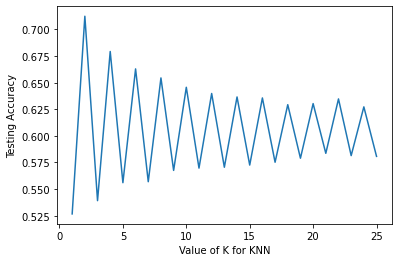

In [58]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [59]:
print("Maximum accuracy:-",max(scores),"at K =",scores.index(max(scores))+1)

Maximum accuracy:- 0.7124309957063996 at K = 2


In [60]:
cols_input= pickle.load(open('scaler.sav','rb'))

Here we would like to build a simple two-layer neural network from scratch using the structure introduced by Eric Ma:

- Model
- Loss function
- Optimization Routine



# Model
The model we will use is a two-layer neural network as shown below:title

Here we will have n_x input variables, n_1 hidden nodes and an output node. For this model we will use logistic regression 𝜎(𝑧) for the hidden and output nodes.

𝜎(𝑧)=11−𝑒𝑥𝑝(−𝑧)

The model we will use is a two-layer neural network as shown below:
  

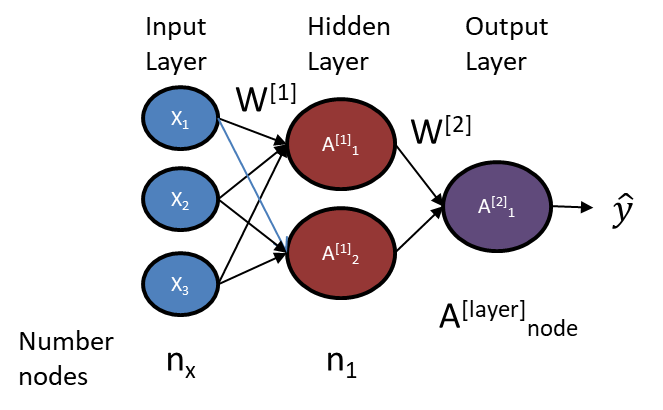

In [61]:
def logistic(z):
    # vectorized logistic function
    return 1 / (1 + np.exp(-z))

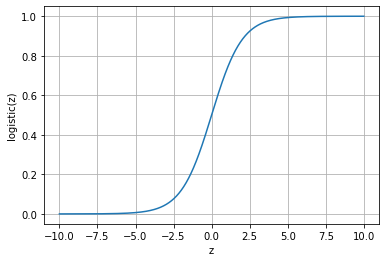

In [62]:
z = np.linspace(-10,10,1000)
plt.plot(z, logistic(z),'-')
plt.xlabel('z')
plt.ylabel('logistic(z)')
plt.grid(True)
plt.show()

Our logistic model will follow the form:


$a = \sigma(z)$
where $z = W X + b$

Here we will use vectorized notation for more efficient algorithms.

In this notation, the first column of X will be all of features for a single sample.

Here, let's say we have m samples.

The parameters we will use for this model with dimensions in curly braces are:

$W^{[1]} \quad \{n_1, n_x \}$

$b^{[1]} \quad \{n_1, 1 \}$

$W^{[2]} \quad \{1, n_1 \}$

$b^{[2]} \quad \{1, 1 \}$

Let's initialize our parameters in a dictionary with random inputs.

In [63]:
nx = len(cols_num + cols_cat)
print(nx)

34


lets choose 15 hidden nodes

In [64]:
n1 = 20

In [65]:
params = dict()
params['W1'] = np.random.randn(n1,nx)
params['b1'] = np.random.randn(n1,1)
params['W2'] = np.random.randn(1,n1)
params['b2'] = np.random.randn(1,1)

In [66]:
def feedforward_2layer(params, act, X):
    # feedforward equations for 2 layer neural network using activation function act for hidden layer
    
    
    
    #input layer
    A0 = X.T # transpose for consistency with Andrew Ng
    # hidden layer
    Z1 = np.dot(params['W1'], A0) + params['b1']
    A1 = act(Z1)
    # output layer
    Z2 = np.dot(params['W2'], A1) + params['b2']
    A2 = logistic(Z2)

    # make a dictionary of values
    ff = dict()
    ff['A0'] = A0 
    ff['A1'] = A1
    ff['A2'] = A2
    ff['Z1'] = Z1
    ff['Z2'] = Z2
    return ff

In [67]:
X_train_tf.shape

(18000, 34)

In [68]:
ff = feedforward_2layer(params, logistic, X_train_tf)

In [69]:
ff['A0'].shape

(34, 18000)

In [70]:
ff['A1'].shape

(20, 18000)

In [71]:
ff['Z1'].shape

(20, 18000)

In [72]:
ff['A2'].shape

(1, 18000)

In [73]:
ff['Z2'].shape

(1, 18000)

In [74]:
def logistic_loss(Y_hat, Y):
    # calculate the logistic loss
    return -np.sum(Y*np.log(Y_hat)+(1-Y)*np.log(1 - Y_hat))/Y.shape[0]

In [75]:
logistic_loss(ff['A2'], y_train.T) # note we have to transpose Y for consistent dimensions

1.014438444815613

In [76]:
y_train.T.shape[0]

18000

In [77]:
def backprop_layer2(params, act_prime, ff,Y):
    # backpropagation using derivative of activation function act_prime with feedforward cache ff
    
    m = Y.shape[0]
    dZ2 = ff['A2'] - Y
    db2 = np.sum(dZ2, axis = 1, keepdims = True)/m
    dW2 = np.dot(dZ2, ff['A1'].T)/m
    
    dZ1 = np.dot(params['W2'].T, dZ2) * act_prime(ff['Z1']) # elementwise multiplication
    db1 = np.sum(dZ1, axis = 1, keepdims = True)/m
    dW1 = np.dot(dZ1, ff['A0'].T)/m
    
    backprop = dict()
    backprop['b2'] = db2
    backprop['W2'] = dW2
    backprop['b1'] = db1
    backprop['W1'] = dW1
    return backprop

In [78]:
def d_logistic(z):
    return logistic(z) * (1-logistic(z))

In [79]:
d_params = backprop_layer2(params, d_logistic, ff, y_train.T)

In [80]:
params['b1'].shape, d_params['b1'].shape

((20, 1), (20, 1))

In [81]:
params['W1'].shape, d_params['W1'].shape

((20, 34), (20, 34))

In [82]:
params['b2'].shape, d_params['b2'].shape

((1, 1), (1, 1))

In [83]:
params['W2'].shape, d_params['W2'].shape

((1, 20), (1, 20))

#  Optimization Routine


In [84]:
from tqdm import tqdm_notebook as tqdmn

In [85]:
alpha = 0.1
params = dict()
params['W1'] = np.random.randn(n1,nx)
params['b1'] = np.random.randn(n1,1)
params['W2'] = np.random.randn(1,n1)
params['b2'] = np.random.randn(1,1)

losses = []

ff = feedforward_2layer(params, logistic, X_train_tf)
losses.append(logistic_loss(ff['A2'], y_train.T)) # note we have to transpose Y for consistent dimensions    
for ii in tqdmn(range(2000)):
    d_params = backprop_layer2(params, d_logistic, ff, y_train.T)
    for name, value in d_params.items():
        params[name] = params[name] - alpha*value
    ff = feedforward_2layer(params, logistic, X_train_tf)
    loss = logistic_loss(ff['A2'], y_train.T)
    if (ii % 100) == 0:
        print(ii,':',loss)
    losses.append(loss)

C:\Users\Pooja\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if sys.path[0] == '':


  0%|          | 0/2000 [00:00<?, ?it/s]

0 : 1.0566953425094854
100 : 0.7419123790884247
200 : 0.713184571159089
300 : 0.6995597481806815
400 : 0.6912566389895435
500 : 0.6855663486433601
600 : 0.6814274787862484
700 : 0.6783025638634075
800 : 0.675876761687487
900 : 0.6739537786476913
1000 : 0.6724038965358454
1100 : 0.6711374099608824
1200 : 0.6700901006556206
1300 : 0.6692147527394562
1400 : 0.6684759435903237
1500 : 0.6678466804199591
1600 : 0.6673061244035616
1700 : 0.6668379989083084
1800 : 0.6664294536854695
1900 : 0.6660702435965421


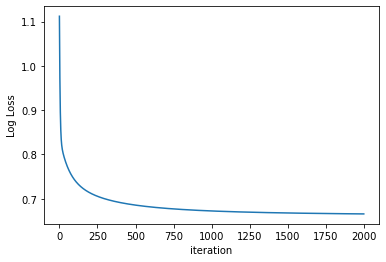

In [86]:
plt.plot(losses,'-')
plt.xlabel('iteration')
plt.ylabel('Log Loss')
plt.show()

In [87]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
def calc_prevalence(y_actual):
    return (sum(y_actual)/len(y_actual))
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)
def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print(' ')
    return auc, accuracy, recall, precision, specificity

In [88]:
ff_train = feedforward_2layer(params, logistic, X_train_tf)
y_train_preds = ff_train['A2'].T
ff_valid = feedforward_2layer(params, logistic, X_valid_tf)
y_valid_preds = ff_valid['A2'].T

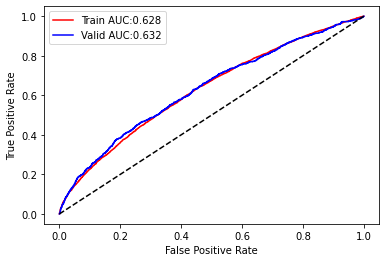

In [89]:
from sklearn.metrics import roc_curve 

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)

fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)


plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
plt.plot(fpr_valid, tpr_valid, 'b-',label ='Valid AUC:%.3f'%auc_valid)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# KERAS

In [90]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.utils import to_categorical

In [91]:
# make y labels that work nicely with Keras
y_train_keras = to_categorical(y_train,2)
y_valid_keras = to_categorical(y_valid,2)

y_train_keras.shape

(18000, 2)

In [92]:
# build the same model
# lets test out relu (a different activation function) and add drop out (for regularization)
model = Sequential()
model.add(Dense(64, activation = 'relu', 
                input_dim = X_train_tf.shape[1]))
model.add(Dropout(rate = 0.25))
model.add(Dense(2, activation = 'softmax'))

In [93]:
# compile the model - use categorical crossentropy, and the adam optimizer
model.compile(
                loss = 'categorical_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

In [94]:
model.fit(X_train_tf, y_train_keras, 
          batch_size =33, epochs= 5, 
          verbose = 1)

Epoch 1/5
546/546 [==============================] - 2s 3ms/step - loss: 0.6999 - accuracy: 0.5709
Epoch 2/5
546/546 [==============================] - 2s 4ms/step - loss: 0.6768 - accuracy: 0.5815
Epoch 3/5
546/546 [==============================] - 2s 3ms/step - loss: 0.6673 - accuracy: 0.5923
Epoch 4/5
546/546 [==============================] - 2s 3ms/step - loss: 0.6677 - accuracy: 0.5916
Epoch 5/5
546/546 [==============================] - 2s 3ms/step - loss: 0.6648 - accuracy: 0.5952


In [95]:
y_train_preds_keras = model.predict_proba(X_train_tf,verbose = 1)[:,1]
y_valid_preds_keras = model.predict_proba(X_valid_tf,verbose = 1)[:,1]

Instructions for updating:
Please use `model.predict()` instead.
306/306 [==============================] - 1s 2ms/step


In [96]:
print('Train');
print_report(y_train[:], y_train_preds_keras, thresh=0.5)
print('Valid');
print_report(y_valid[:], y_valid_preds_keras, thresh=0.5);

Train
AUC:0.650
accuracy:0.607
recall:0.598
precision:0.609
specificity:0.615
prevalence:0.500
 
Valid
AUC:0.648
accuracy:0.595
recall:0.603
precision:0.158
specificity:0.594
prevalence:0.112
 


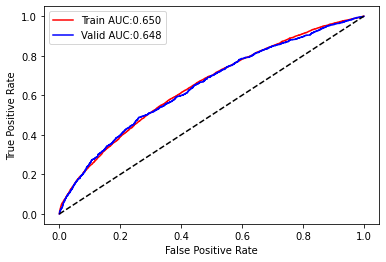

In [97]:
from sklearn.metrics import roc_curve 

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds_keras)
auc_train = roc_auc_score(y_train, y_train_preds_keras)

fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds_keras)
auc_valid = roc_auc_score(y_valid, y_valid_preds_keras)


plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
plt.plot(fpr_valid, tpr_valid, 'b-',label ='Valid AUC:%.3f'%auc_valid)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()